In [3]:
pip install pandas matplotlib seaborn wordcloud openpyxl

Note: you may need to restart the kernel to use updated packages.


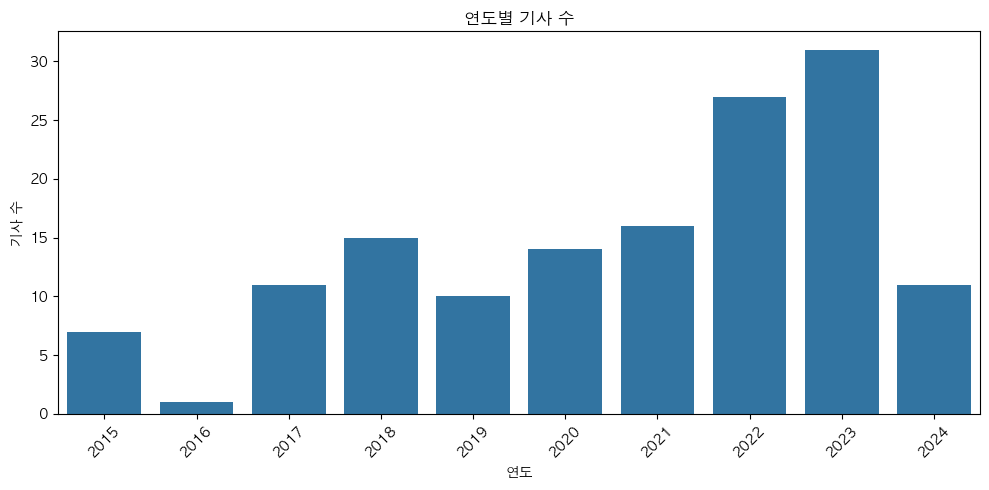

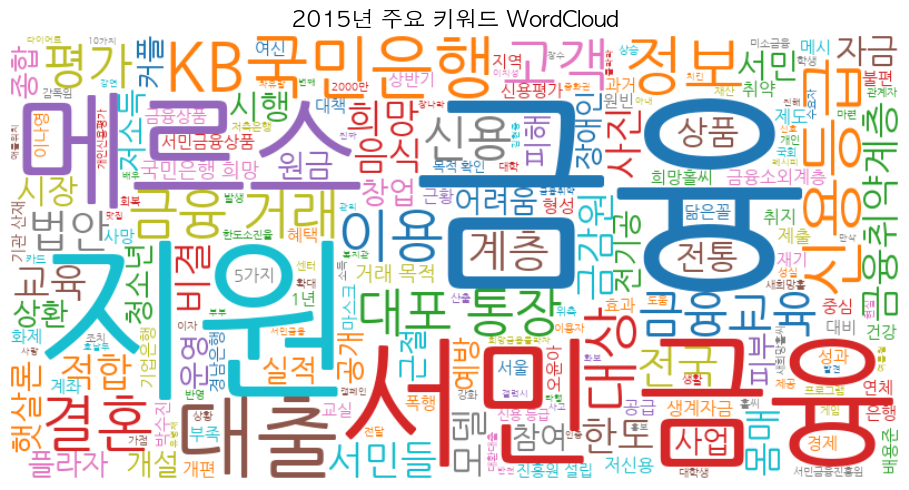

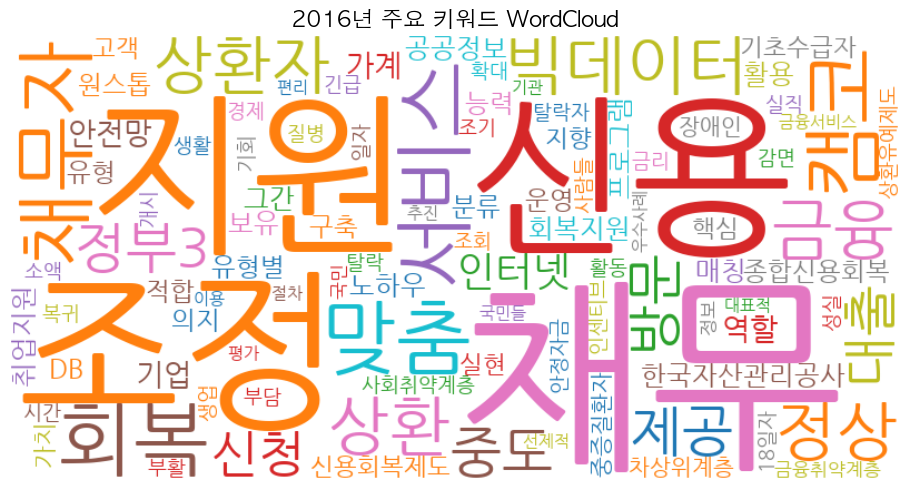

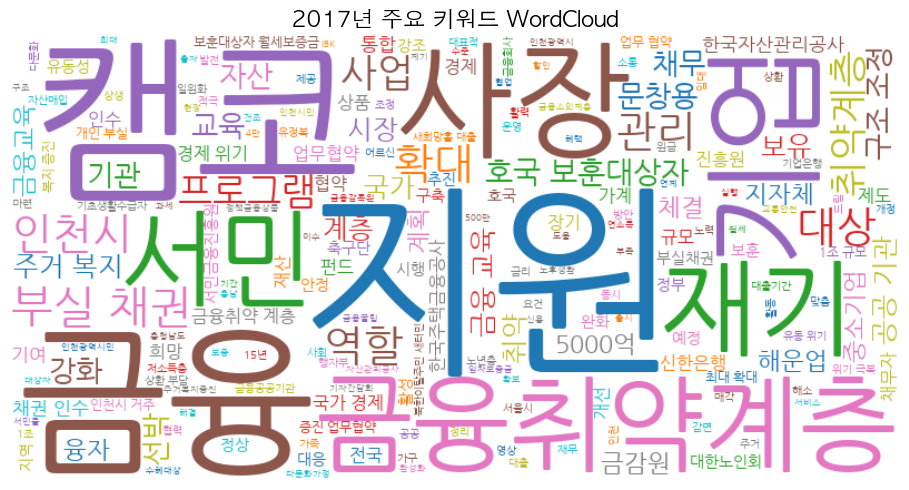

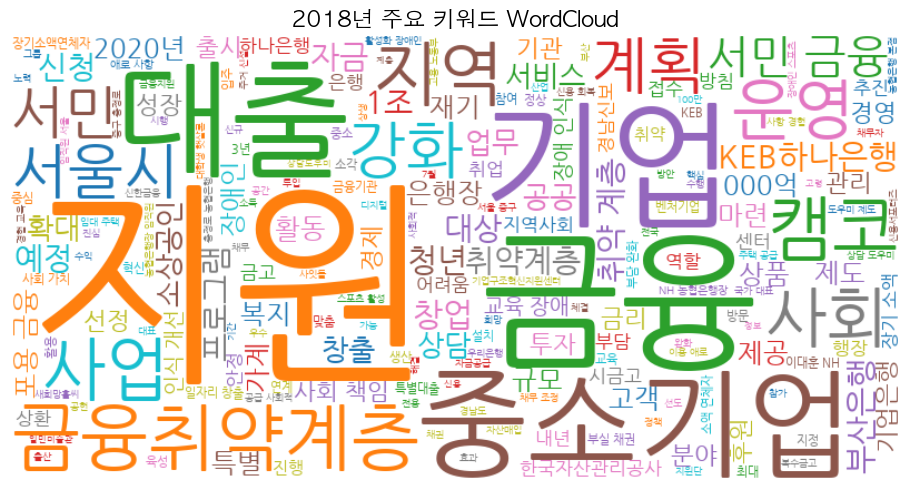

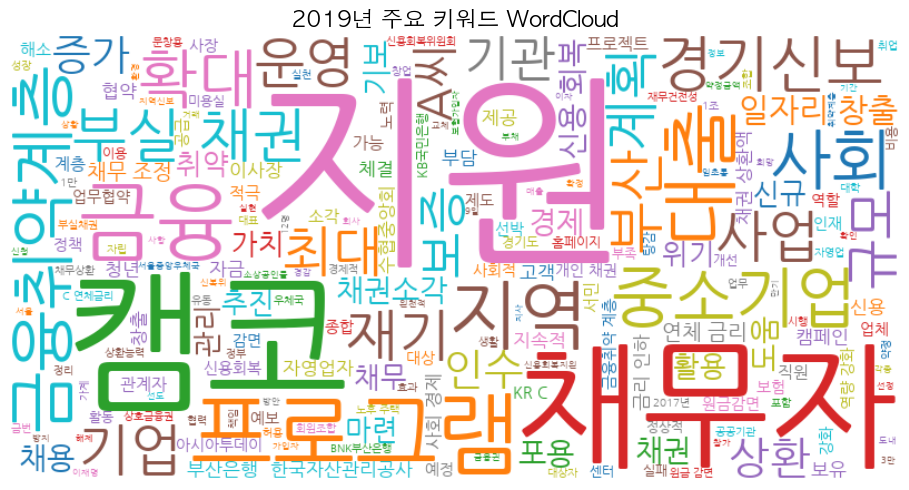

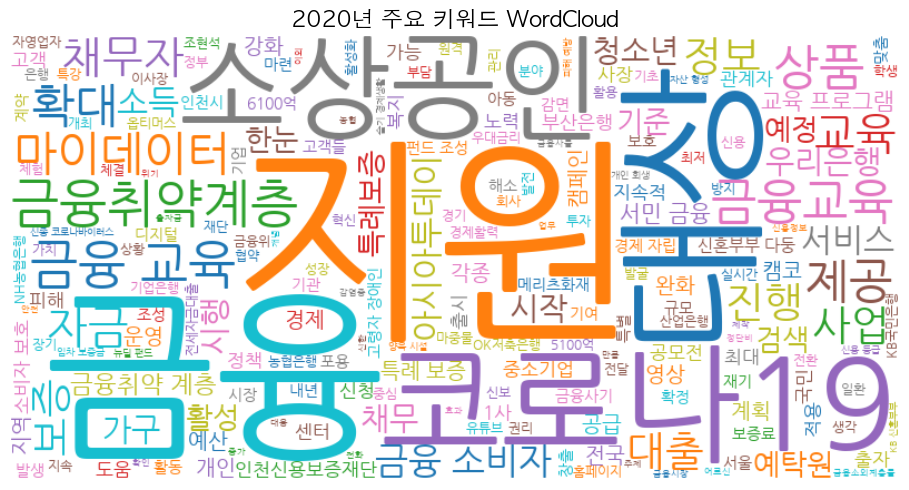

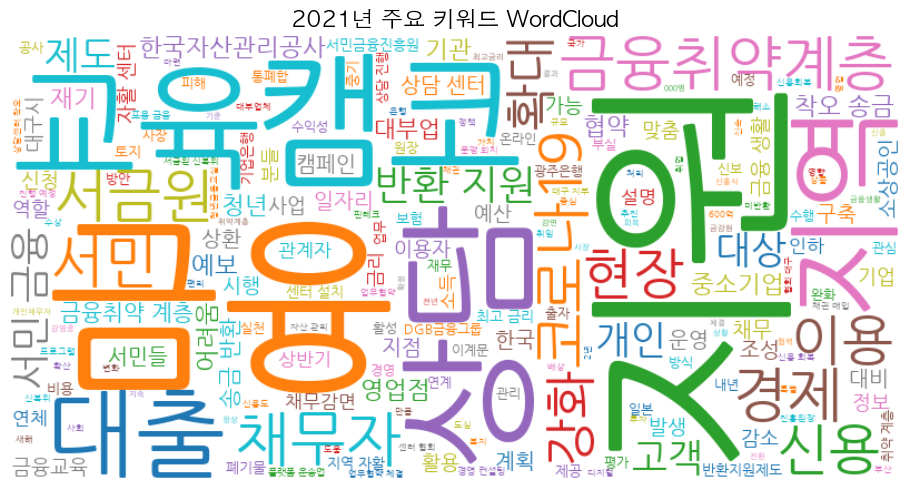

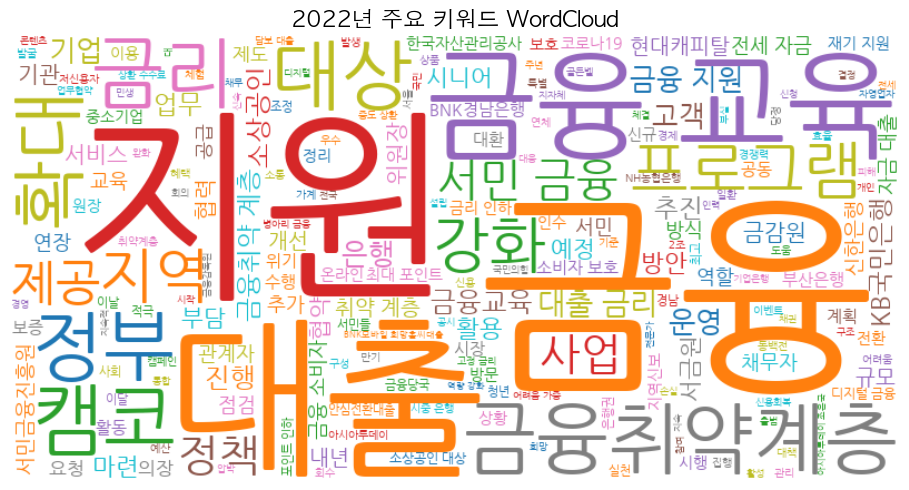

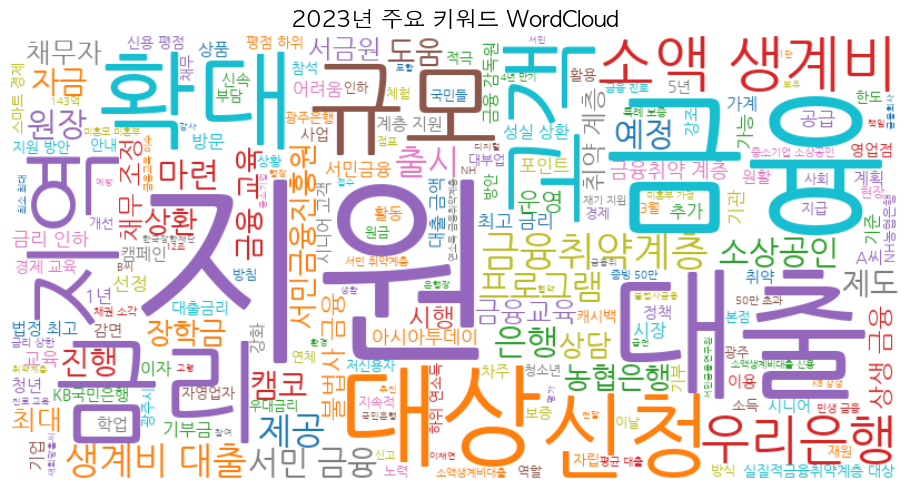

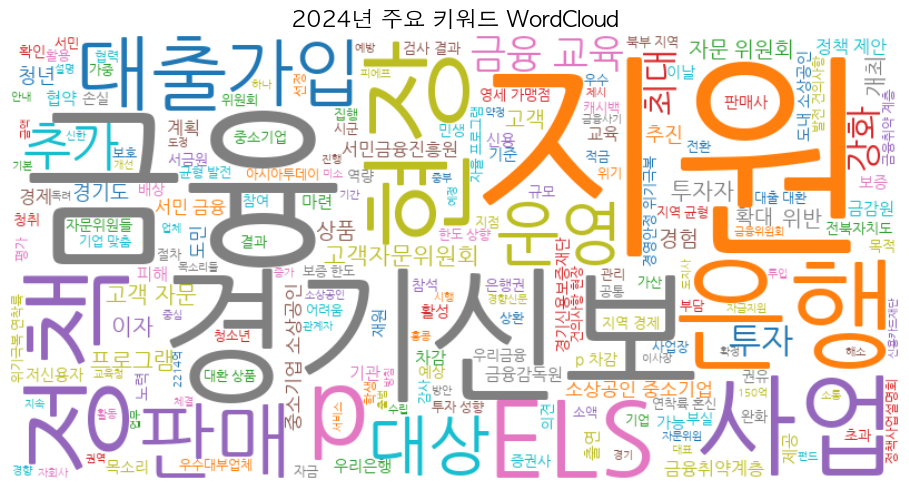

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.font_manager as fm  # Ìè∞Ìä∏ Í≤ΩÎ°úÎ•º rcParamsÏóê Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöî
from matplotlib import rc  


rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

# --- ÏóëÏÖÄ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ ---
file_path = "/Users/jochaeyeon/Desktop/4-2/Ï∫°Ïä§ÌÜ§_ÌñâÏ†ï/capstondesign_-administration/ÌïÑÌÑ∞ÎßÅ.xlsx"
df = pd.read_excel(file_path)

# # ‚úÖ ÎÑàÍ∞Ä ÏÑ§ÏπòÌïú ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
# font_path = "/Users/jochaeyeon/Downloads/ÎÇòÎàî Í∏ÄÍº¥/ÎÇòÎàîÍ≥†Îîï/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"

# # ‚úÖ matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
# plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
# plt.rcParams['axes.unicode_minus'] = False

# --- Ïó∞ÎèÑ Ï∂îÏ∂ú ---
df['Ïó∞ÎèÑ'] = pd.to_datetime(df['ÏùºÏûê']).dt.year

# ============================
# üéØ 1. Ïó∞ÎèÑÎ≥Ñ Í∏∞ÏÇ¨ Ïàò Î∞î Ï∞®Ìä∏
# ============================
yearly_counts = df['Ïó∞ÎèÑ'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Ïó∞ÎèÑÎ≥Ñ Í∏∞ÏÇ¨ Ïàò")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("Í∏∞ÏÇ¨ Ïàò")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================
# üéØ 2. Ïó∞ÎèÑÎ≥Ñ ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
# ============================
yearly_keywords = defaultdict(list)

for _, row in df.iterrows():
    year = row['Ïó∞ÎèÑ']
    keywords = str(row['ÌÇ§ÏõåÎìú']).split(',') if pd.notnull(row['ÌÇ§ÏõåÎìú']) else []
    yearly_keywords[year].extend(keywords)

# Ïó∞ÎèÑÎ≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
for year, keywords in sorted(yearly_keywords.items()):
    text = ' '.join(keywords)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=font_path,
        colormap='tab10'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{year}ÎÖÑ Ï£ºÏöî ÌÇ§ÏõåÎìú WordCloud", fontsize=16)
    plt.tight_layout()
    plt.show()
